<a href="https://colab.research.google.com/github/rze7ud/DS3001_Final_Project/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling

Our project is located in a private GitHub repository, therefore, in order to clone the repository we must attach a GitHub token to the link in the clone command. A .env file must be uploaded in our Google Colab instance which includes both the GitHub token and the API Key used in the data collection notebook.

In [ ]:
! pip install python-dotenv
from dotenv import load_dotenv
import os

load_dotenv()
GITHUB_TOKEN = os.getenv('GITHUB_TOKEN')

repo_url = f"https://{GITHUB_TOKEN}@github.com/rze7ud/DS3001_Final_Project/"

os.system(f"git clone {repo_url}")

Next we are including all of the python imports that we use in this file:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

Here we read in our data into pandas dataframes.

\* *Note: The season column in clemson_2021_2024.csv was saved as a float and must be converted into an int so we can merge later.*

In [71]:
clemson_df = pd.read_csv("/content/DS3001_Final_Project/data/clemson_2001_2024.csv")
clemson_df['season'] = clemson_df['season'].astype(int)
clemson_opp_df = pd.read_csv("/content/DS3001_Final_Project/data/clemson_opp_2001_2024.csv")

# 2. EDA

Dataframes:

* clemson_df: 24x47 dataframe with season, defensive and offensive season statistics for Clemson. Years range from 2001 to 2024.
* clemson_opp_df: 268x54 dataframe with season, week, matchup result, defensive and offensive season statistics for opponent each week of the season. Years range from 2001 to 2024.

In [ ]:
clemson_df.info()
clemson_opp_df.info()

We merged the dataframes together into the dataframe "clemson" so Clemson's season statistics were included each week. Since we collected season statistics, Clemson's stats are duplicated on each row of each season after the season statistics of the opponents.

In [72]:
clemson = pd.merge_asof(clemson_opp_df, clemson_df, on ='season')

last_row = len(clemson)-1
cur = clemson.loc[last_row]
clemson = clemson.drop(clemson.index[last_row])

"Predicted Points Added" is a sports analytics metric commonly used in football, it evaluates the impact of each play by comparing the expected points before and after the play. A positive EPA reflects a successful play that boosts the chances of scoring, while a negative EPA indicates a play that reduces scoring potential. We plotted this graph for both Clemson and their opponents and found that Clemson has a higher mean than their opponents at 128.05 compared to 81.59.

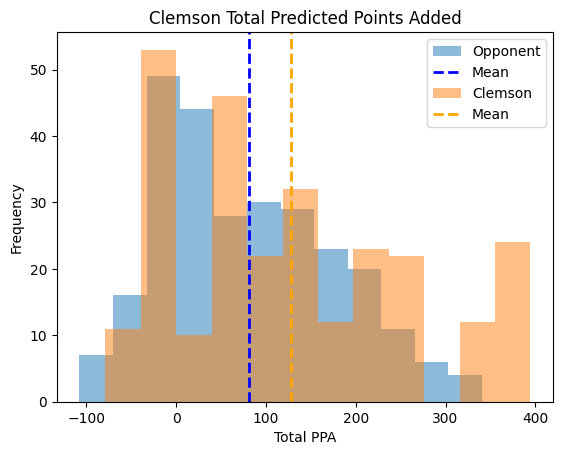

In [73]:
plt.hist(clemson['opp_off_total_ppa'], alpha=0.5, label='Opponent', bins=12)
opp_mean = np.mean(clemson['opp_off_total_ppa'])
plt.axvline(opp_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.hist(clemson['off_total_ppa'], alpha=0.5, label='Clemson', bins=12)
mean = np.mean(clemson['off_total_ppa'])
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('Clemson Total Predicted Points Added')
plt.xlabel('Total PPA')
plt.ylabel('Frequency')
plt.show()

We can see on the scatter plot of Clemson Points Scored v. Opponents Points scored, there is no obvious correlation between the variables nor clusters of conferences.

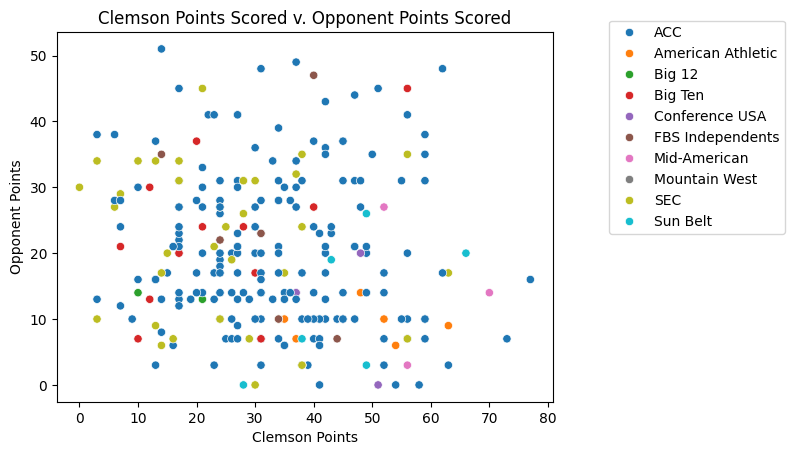

In [85]:
clemson['opp_conference'] = clemson['opp_conference'].astype(str)
clemson['opp_conference'] = clemson['opp_conference'].astype('category')

sns.scatterplot(data=clemson, x='clemson_points', y='opp_points', hue='opp_conference')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Clemson Points Scored v. Opponent Points Scored')
plt.xlabel('Clemson Points')
plt.ylabel('Opponent Points')
plt.show()

# 3. Prediction Question

**How do key season statistics (e.g., total yards, turnover margins, strength of schedule) influence the prediction of the ACC championship winner and score?**

# 3. Model

In [112]:
# Still very much in progress

clemson.dropna(inplace=True)

dummies = pd.get_dummies(clemson['opp_conference'])
print(dummies.columns)

# y = out[['win', 'clemson_points', 'opp_points']]

y = clemson[['opp_points']]
X = clemson.drop(['win', 'clemson_points', 'opp_points', 'opp', 'opp_conference'], axis=1)
# = out.drop(['win', 'opp', 'opp_conference'], axis=1)
X = pd.concat([X, dummies], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
reduction = PCA(n_components=34).fit(X_train)
Z_train = reduction.transform(X_train)
Z_test = reduction.transform(X_test)

lm_k = LinearRegression().fit(Z_train,y_train)
y_hat_test = lm_k.predict(Z_test)
y_hat_train = lm_k.predict(Z_train)

print('Train r^2: ', r2_score(y_hat_train, y_train))
print('Test r^2: ', r2_score(y_hat_test, y_test))

Index(['ACC', 'American Athletic', 'Big 12', 'Big Ten', 'Conference USA',
       'FBS Independents', 'Mid-American', 'Mountain West', 'SEC', 'Sun Belt'],
      dtype='object')
Train r^2:  -0.3920241276088281
Test r^2:  -1.4625617845226158
